# Hola Yair! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div>


## Resumen de la revisión 1 <a class="tocSkip"></a>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Buen trabajo Yair! Tu notebook está bastante bien desarrollado. Creo que has mantenido un orden correcto y el código adecuado para las tareas a completar. Hay algunos puntos que debes corregir, principalmente la eliminación de nulos, el periodo de datos, la rentabilidad por género y los test de hipótesis. Dejé comentarios detallados en cada una de esas partes para que los revises.
    
Saludos!    
</div>

## Resumen de la revisión 2 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Bien hecho! Has completado todas las partes indicadas y ahora tu notebook está completo. Recuerda eso sí que el periodo de tiempo a considerar para un modelo de proyección no debe incluir tantos años al pasado, la información más relevante está en años recientes.
    
Saludos!    
</div>

----

## Paso 1. Abre el archivo de datos y estudia la información general 

In [35]:
#importar las bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import levene

In [2]:
#leer el dataset
games = pd.read_csv("/datasets/games.csv")

In [3]:
#ver la informacion del df
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Paso 2. Prepara los datos

In [4]:
#Reemplaza los nombres de las columnas (ponlos en minúsculas).
games.columns= games.columns.str.lower()
#contar los elementos ausentes 
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Bien, las columnas quedan en snakecase
</div>

Quitar las filas ausentes y cambiar el tipo de datos

In [5]:
#eliminar los datos ausentes en la columna year of release para convertir a entero el tipo de dato
games = games.dropna(subset=["year_of_release"])
#eliminar los datos ausentes en la columna critic score para convertir a entero el tipo de dato
mean_criticscore=games["critic_score"].mean()
games["critic_score"].fillna(mean_criticscore,inplace=True)
#eliminar los datos ausentes en la columna user score para convertir a entero el tipo de dato
mean_userscore=pd.to_numeric(games['user_score'], errors='coerce').mean()
games["user_score"].fillna(mean_userscore,inplace=True)
#eliminar los datos ausentes en la columna rating
#games = games.dropna(subset=["rating"])
#Convierte los datos en los tipos necesarios.
games["year_of_release"] = games["year_of_release"].astype("int64") #en este caso se convierte a int para eliminar los decimales
games["critic_score"] = games["critic_score"].astype("int64")#en este caso se convierte a int para eliminar los decimales


quite los valores ausentes porque para el analisis no sirve estos datos

Los datos en estas columnas deben estar ausente por algun tipó de error en el dataframe

En el caso de tbd no entraran en el analisis porque aun no se calificaron

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Para los score y rating son muchas las filas que has eliminado, eso quitará bastantes datos. Si bien no se analizar tanto estas columnas, los valores de esas filas que removiste, si podrán ser útiles. Te sugiero que los reemplaces por algún valor especial o simplemente no los modifiques para tener más data en las otras columnas. La eliminación de nulos siempre depende de la cantidad relativa de filas a eliminar, antes de eliminar los nulos, podrías verificar que porcentaje son respecto al total.
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Ok, bien, también podrías haberlos dejado en 0 por ejemplo. Incluso, podría estar justificado dejarlos como nulos.
</div>

In [6]:
#añadir la columna total sales al dataframe
games["total_sales"] = games["na_sales"]+games["eu_sales"]+games["jp_sales"]+games["other_sales"]

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto. Otra forma es games['total_sales']=games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
</div>

In [7]:
#multiplicar user score para compararlo con critic score 
games['user_score'].replace('tbd', np.nan, inplace=True)

games["user_score"] = games['user_score'].astype("float64")
games["user_score"] = games["user_score"]*10

#convertir critic score a float
games["critic_score"] = games['critic_score'].astype("float64")
games.tail(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.00,0.0,67.0,NaN,E,0.01
16696,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.0,61.0,58.000000,T,0.01
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.00,0.0,53.0,NaN,E,0.01
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.00,0.0,48.0,NaN,E,0.01
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.0,68.0,71.263299,NaN,0.01
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.0,68.0,71.263299,NaN,0.01
16701,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007,Role-Playing,0.00,0.00,0.01,0.0,68.0,71.263299,NaN,0.01
16702,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.0,60.0,72.000000,E10+,0.01
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.0,68.0,71.263299,NaN,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.0,68.0,NaN,E,0.01


## Paso 3. Analiza los datos

### Cuantos juegos salieron en cada año?

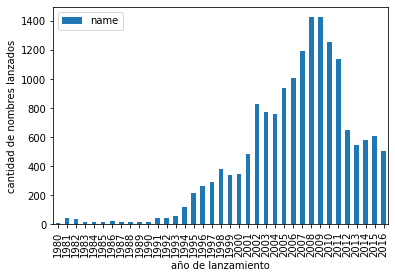

In [8]:
df_year=games.groupby("year_of_release")["name"].count().reset_index()
df_year
df_year.plot(kind="bar",x="year_of_release",y="name")
plt.xlabel("año de lanzamiento")
plt.ylabel("cantidad de nombres lanzados")
plt.show()

estos datos no muestran ningun patron para el analisis

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Esta data es correcta, pero mejor presentala en un gráfico de barras por ejemplo. A la hora de mostrar resultados como este, es mucho mejor mostrarlos en un gráfico para identificar inmediatamente dónde crecen y dónde disminuyen.
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Muy bien, correcto  
</div>

### cómo varían las ventas de una plataforma a otra

In [9]:
platform_year_sales = games.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

plataformas_unicas = platform_year_sales['platform'].unique()

# crea una lista para almacenar las sumas totales de ventas por plataforma
sumas_ventas_por_plataforma = []


for plataforma in plataformas_unicas:
    ventas_plataforma = platform_year_sales[platform_year_sales['platform'] == plataforma]
    suma_ventas = ventas_plataforma['total_sales'].sum()
    sumas_ventas_por_plataforma.append((plataforma, suma_ventas))
df_sumas_ventas = pd.DataFrame(sumas_ventas_por_plataforma, columns=["plataforma", "ventas_totales"])
df_sumas_ventas = df_sumas_ventas.sort_values(by="ventas_totales", ascending=False)
df_sumas_ventas

,plataforma,ventas_totales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


las plataformas con mayores ventas totales son ps2 ,x360 ,ps3 ,wii y DS

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto. Aquí también te sugiero un gráfico, aunque es opcional
</div>

### distribución basada en los datos de cada año

<Figure size 720x432 with 0 Axes>

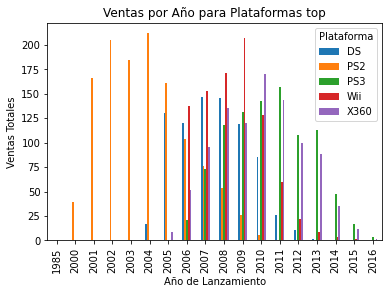

In [10]:
platform_top=["PS2","X360","PS3","Wii","DS"]
df_ventas= games[games["platform"].isin(platform_top)]
df_filter= df_ventas.groupby(["platform","year_of_release"])["total_sales"].sum().reset_index()
df_pivot = df_filter.pivot(index='year_of_release', columns='platform', values='total_sales')

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

# Plotea el gráfico de barras
df_pivot.plot(kind='bar')

plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales')
plt.title('Ventas por Año para Plataformas top')
plt.legend(title='Plataforma')

# Muestra el gráfico
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Ok, está bien, aunque te sugeriría mejor unos gráficos de línea para esto
</div>

<Figure size 720x432 with 0 Axes>

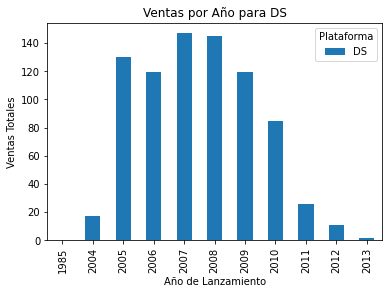

In [11]:
#distribucion de DS
platform_top=["DS"]
df_ventas= games[games["platform"].isin(platform_top)]
df_filter= df_ventas.groupby(["platform","year_of_release"])["total_sales"].sum().reset_index()
df_pivot = df_filter.pivot(index='year_of_release', columns='platform', values='total_sales')

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

# Plotea el gráfico de barras
df_pivot.plot(kind='bar')

plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales')
plt.title('Ventas por Año para DS')
plt.legend(title='Plataforma')

# Muestra el gráfico
plt.show()

<Figure size 720x432 with 0 Axes>

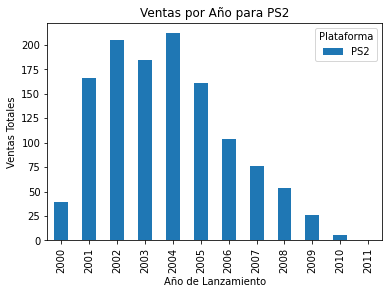

In [12]:
#distribucion de ps2
platform_top=["PS2"]
df_ventas= games[games["platform"].isin(platform_top)]
df_filter= df_ventas.groupby(["platform","year_of_release"])["total_sales"].sum().reset_index()
df_pivot = df_filter.pivot(index='year_of_release', columns='platform', values='total_sales')

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

# Plotea el gráfico de barras
df_pivot.plot(kind='bar')

plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales')
plt.title("Ventas por Año para PS2")
plt.legend(title='Plataforma')

# Muestra el gráfico
plt.show()

<Figure size 720x432 with 0 Axes>

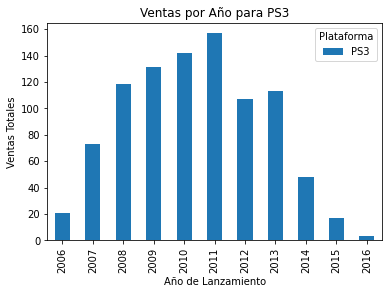

In [13]:
#distribucion de ps3
platform_top=["PS3"]
df_ventas= games[games["platform"].isin(platform_top)]
df_filter= df_ventas.groupby(["platform","year_of_release"])["total_sales"].sum().reset_index()
df_pivot = df_filter.pivot(index='year_of_release', columns='platform', values='total_sales')

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

# Plotea el gráfico de barras
df_pivot.plot(kind='bar')

plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales')
plt.title("Ventas por Año para PS3")
plt.legend(title='Plataforma')

# Muestra el gráfico
plt.show()

<Figure size 720x432 with 0 Axes>

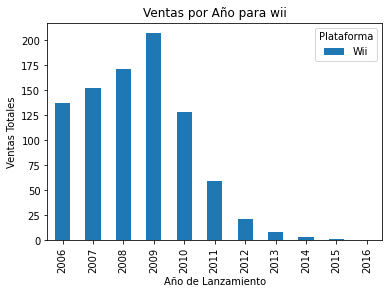

In [14]:
#distribucion de wii
platform_top=["Wii"]
df_ventas= games[games["platform"].isin(platform_top)]
df_filter= df_ventas.groupby(["platform","year_of_release"])["total_sales"].sum().reset_index()
df_pivot = df_filter.pivot(index='year_of_release', columns='platform', values='total_sales')

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

# Plotea el gráfico de barras
df_pivot.plot(kind='bar')

plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales')
plt.title("Ventas por Año para wii")
plt.legend(title='Plataforma')

# Muestra el gráfico
plt.show()

<Figure size 720x432 with 0 Axes>

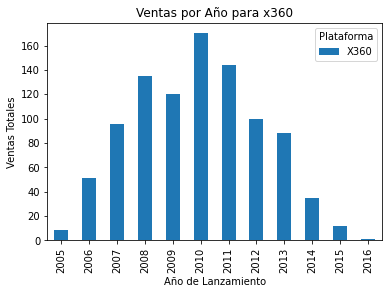

In [15]:
#distribucion de x360
platform_top=["X360"]
df_ventas= games[games["platform"].isin(platform_top)]
df_filter= df_ventas.groupby(["platform","year_of_release"])["total_sales"].sum().reset_index()
df_pivot = df_filter.pivot(index='year_of_release', columns='platform', values='total_sales')

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

# Plotea el gráfico de barras
df_pivot.plot(kind='bar')

plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales')
plt.title("Ventas por Año para x360")
plt.legend(title='Plataforma')

# Muestra el gráfico
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien con los gráficos de cada plataforma
</div>

### plataformas que solían ser populares pero que ahora no tienen ventas

In [16]:
platform_top=["PS2","X360","PS3","Wii","DS"]
df_ventas= games[games["platform"].isin(platform_top)]
df_ventas_2015 = df_ventas[df_ventas["year_of_release"]==2015]
df_ventas_2016 = df_ventas[df_ventas["year_of_release"]==2016]


print(df_ventas_2016)

                                                    name platform  \
2782                                             FIFA 17      PS3   
5010                                             FIFA 17     X360   
5689                              LEGO Marvel's Avengers     X360   
6355                              LEGO Marvel's Avengers      PS3   
7727                                    MLB 16: The Show      PS3   
8009                                     Just Dance 2017      Wii   
8265                                       Madden NFL 17     X360   
8566                   Lego Star Wars: The Force Awakens      PS3   
9132                                            WWE 2K17      PS3   
9360   Dragon Quest Heroes II: Twin Kings and the Pro...      PS3   
9465                           Pro Evolution Soccer 2017      PS3   
9629                                            NBA 2K17      PS3   
9806                   Lego Star Wars: The Force Awakens     X360   
9833              Dragon Quest Bui

Las plataformas que solian ser populares ,ahora ya no tienen ventas y excepto por ps3 y xone 

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Ok, correcto.
</div>

### ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [17]:
#determinar la ultima vez que sa saco un juego en esa plataforma
df_old=games.groupby("platform")["year_of_release"].max()
df_old
#poner las plataformas antiguas en una lista
no_sales=["DC","DS","GBA","GC","PS","PS2","XB"]

platform_forget = games[games["platform"].isin(no_sales)]
platform_forget = platform_forget.groupby("platform")["year_of_release"].agg(["min","max"])
life_old_platform = platform_forget["max"]-platform_forget["min"]
life_old_platform = life_old_platform.mean()
print(life_old_platform)

11.285714285714286


El promedio de las plataformas antiguas en desaparecer es 7 años

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Muy bien
</div>

In [18]:
#determinar cuanto tardan generalmente las nuevas plataformas en aparecer
first_year = 1985

#determinar las nuevas plataformas
year = games.groupby("platform")["year_of_release"].min().sort_values()
new_generation = ["XOne","PS4","WiiU","PSV","3DS"]
print(year)
new_platform =games[games["platform"].isin(new_generation)]
new_platform= new_platform.groupby("platform")["year_of_release"].agg(min).reset_index()
show_platform =(new_platform["year_of_release"]-first_year).mean()
show_platform

platform
2600    1980
NES     1983
DS      1985
PC      1985
GB      1988
SNES    1990
GEN     1990
GG      1992
SCD     1993
NG      1993
SAT     1994
PS      1994
3DO     1994
TG16    1995
PCFX    1996
N64     1996
DC      1998
WS      1999
GBA     2000
XB      2000
PS2     2000
GC      2001
PSP     2004
X360    2005
PS3     2006
Wii     2006
3DS     2011
PSV     2011
WiiU    2012
PS4     2013
XOne    2013
Name: year_of_release, dtype: int64


27.0

generalmente las nueva plataformas tardan en aparecer 27 años

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Ok, esto no es incorrecto pero no se interpreta muy bien. Lo que quieres decir es que han pasado 27 años desde 1985 hasta que apareció la primera de las plataformas en la lista de las "nuevas" plataformas.
</div>

### Determina para qué período debes tomar datos.

Segun el analisis anterior el periodo para tomar los datos tiene que ser desde el 2011 donde salen dos plataformas nuevas como 3DS y PSV

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

El objetivo del análisis en este notebook es determinar información para poder hacer un modelo de predicción para el 2017, en ese caso, la data de principios del 2011 no tiene mucha utilidad, contiene plataformas que ya no existen, tendencias que ya no están, etc. En general nunca es bueno tener más de 3 o 4 años, y en una industria como los videojuegos probablemente es mejor tener 3 solamente.
    
Los siguientes resultados los juzgaré con esta data, pero ten en cuenta que se debe filtrar la data de forma de quedarse solamente con los últimos 2 o 3 años.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Ojo con esto, la cantidad de años a considerar es importante!
</div>

### ¿Qué plataformas son líderes en ventas?

In [19]:
years_analityc = [2011,2012,2013,2014,2015,2016]
sales = games[games["year_of_release"].isin(years_analityc)]
platform_year_sales = sales.groupby('platform')['total_sales'].sum().reset_index().sort_values(by="total_sales")
platform_year_sales

,platform,total_sales
3,PS2,0.45
6,PSP,29.01
1,DS,38.73
7,PSV,53.81
9,WiiU,82.19
8,Wii,95.02
2,PC,97.68
11,XOne,159.32
0,3DS,257.81
5,PS4,314.14


Las plataformas lideres en ventas son ps3,x360,ps4,xone y 3ds

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto
</div>

### ¿Cuáles crecen y cuáles se reducen?

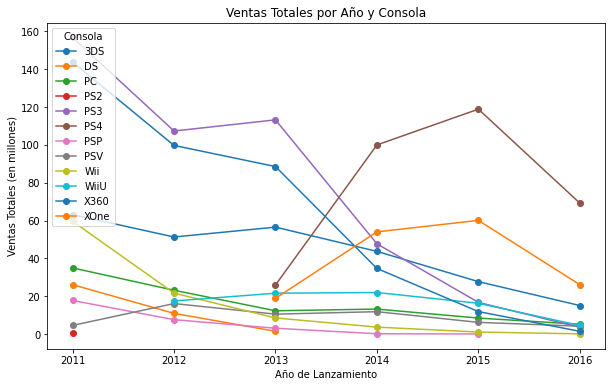

In [20]:
# Agrupa los datos por año y consola y suma las ventas totales
grouped_data = sales.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Plotea el gráfico de líneas
grouped_data.plot(kind='line', marker='o', figsize=(10, 6))

# Personaliza el gráfico
plt.title('Ventas Totales por Año y Consola')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (en millones)')
plt.legend(title='Consola', loc='upper left')

# Muestra el gráfico
plt.show()

de todas las plataformas las que reducen sus ventas son ps3 , x360, 3ds y pc , y generalmente no aumentan al final en 2016 pero las que serian superiores en ventas al final serian ps4 y xone ; y junto con wiiu estan serian potencialmente rentables

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto
</div>

### Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma

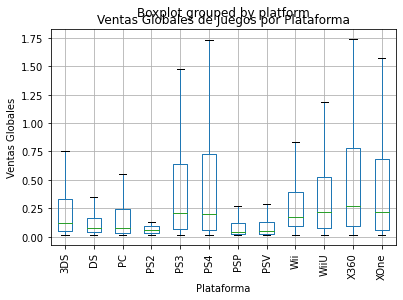

In [21]:

sales.boxplot(column="total_sales", by="platform", showfliers = False)
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales')
plt.title('Ventas Globales de Juegos por Plataforma')
plt.xticks(rotation=90)
plt.show()


por lo que se ve en la diagrama de cajas las difernecias son significativas por cada plataforma 

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Ok, bien aunque podrías haber ahondado más en los comentarios. Nota por ejemplo que todas parecen estar concentradas en la parte baja de ls distribución, es decir, son distribuciones asimétricas más cargadas a los valores menores a 0.5.
</div>

### ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? 

tomando en cuenta que las ventas son en millones de dolares hay diferencias significativas en las ventas de las plataformas debido a que algunas pasan las 2.5 millones y otras no llegan al millon.

Correlación de score de Críticos vs. Ventas: 0.312825148546592
Correlación de score de Usuarios vs. Ventas: -0.01345142352641373


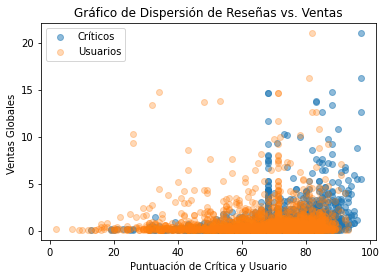

In [22]:
plt.scatter(sales['critic_score'], sales['total_sales'], alpha=0.5, label='Críticos')
plt.scatter(sales['user_score'], sales['total_sales'], alpha=0.3, label='Usuarios')
plt.xlabel('Puntuación de Crítica y Usuario')
plt.ylabel('Ventas Globales ')
plt.title('Gráfico de Dispersión de Reseñas vs. Ventas')
plt.legend()

# Calcular la correlación entre reseñas y ventas
correlation_critic = sales['critic_score'].corr(sales['total_sales'])
correlation_user = sales['user_score'].corr(sales['total_sales'])

print(f"Correlación de score de Críticos vs. Ventas: {correlation_critic}")
print(f"Correlación de score de Usuarios vs. Ventas: {correlation_user}")

plt.show()

segun la comparativa de correlaciones se ve que las valoraciones de los criticos afecta mas a las ventas que las valoraciones de los usuarios, pero no veo una diferencia tan marcada en el grafico

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto. De forma adicional se puede calcular el coeficiente de correlación.
</div>

 ###  compara las ventas de los mismos juegos en otras plataformas

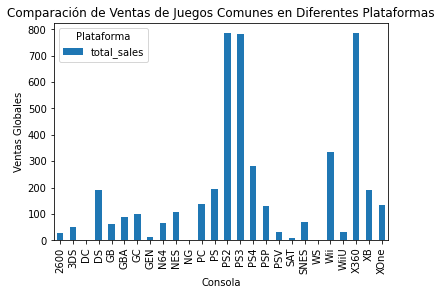

In [23]:
#encontrar juegos que aparezcan en dos o mas plataformas o plataformas que tengan los mismos juegos
games_comuns = games['name'].value_counts()[games['name'].value_counts() > 1].index
# Filtra el DataFrame para incluir solo los juegos comunes
df_comunes = games[games['name'].isin(games_comuns)]
# Agrupa los datos por juego y plataforma, y calcula las ventas totales
df_group = df_comunes.groupby("platform")["total_sales"].sum()

df_group.plot(kind='bar')
plt.xlabel('Consola')
plt.ylabel('Ventas Globales')
plt.title('Comparación de Ventas de Juegos Comunes en Diferentes Plataformas')
plt.legend(title='Plataforma')
plt.xticks(rotation=90)
plt.show()

dentro de los juegos que fueron lanzados para varias plataformas las que mejor se venden fueron en las siguientes consolas : ps2, ps3 y x360

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Ok, muy bien, las consolas más dominantes lo son incluso en los juegos comunes.
</div>

### ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

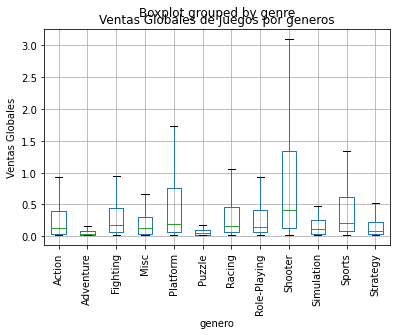

In [24]:

sales.boxplot(column="total_sales", by="genre", showfliers = False)
plt.xlabel('genero')
plt.ylabel('Ventas Globales')
plt.title('Ventas Globales de Juegos por generos')
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Para esta parte además revisa la distribución de los juegos de cada género. Grafica un boxplot por género (similar a como hiciste por plataforma en la parte 3.9)
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Muy bien, correcto  
</div>

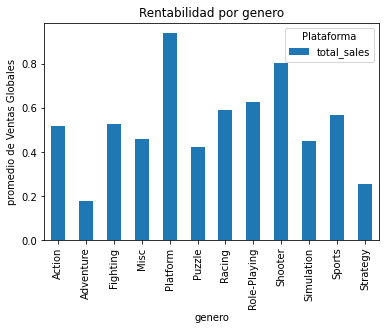

In [32]:
df_grouped = games.groupby("genre")["total_sales"].mean()
df_grouped.plot(kind='bar')
plt.xlabel('genero')
plt.ylabel('promedio de Ventas Globales')
plt.title('Rentabilidad por genero')
plt.legend(title='Plataforma')
plt.xticks(rotation=90)
plt.show()

los genros mas rentables son platform y shooter, ahora no se puede generalizar con respecto a estos porque son muy diferentes 

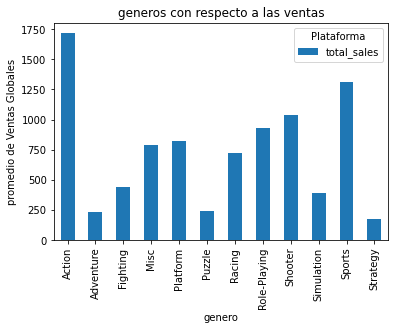

In [34]:
df_grouped = games.groupby("genre")["total_sales"].sum()
df_grouped.plot(kind='bar')
plt.xlabel('genero')
plt.ylabel('promedio de Ventas Globales')
plt.title('generos con respecto a las ventas')
plt.legend(title='Plataforma')
plt.xticks(rotation=90)
plt.show()

los generos que tiene mas ventas son action , sports y shooter dentro de todo estos son los generos mas mainstream de los videojuegos y con respecto a los que tienen menos ventas son adventure, puzzle y strategy que pertenecen a juegos mas de nicho

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Ojo que estos son los géneros que más venta tienen, pero si asumimos que todos tienen un costo de producción promedio similar, entonces para ver la rentabilidad mejor miramos el promedio de ventas de los juegos de cada genero. Calcula el promedio de ventas por juego para cada género y compara nuevamente.
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Correcto, se tiene la visibilidad de ventas totales y el promedio por juego.
</div>

## Paso 4. Crea un perfil de usuario para cada región

### Las cinco plataformas principales.

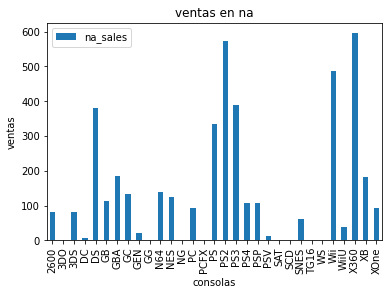

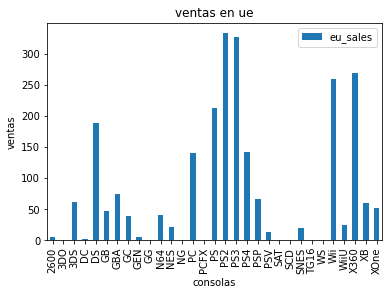

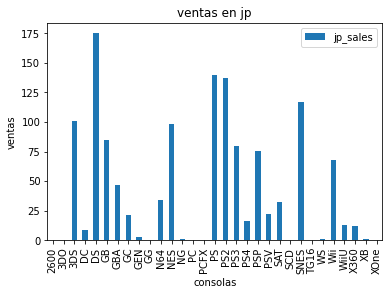

In [26]:
#cinco plataformas principales en la region  NA

df_na=games.groupby("platform")["na_sales"].sum().reset_index()
df_na.plot(kind = "bar",x="platform", y="na_sales")

# Personalizar el gráfico
plt.xlabel("consolas")
plt.ylabel('ventas')
plt.title('ventas en na')

# Mostrar el gráfico
plt.show()
#cinco plataformas principales en la region  UE
df_ue=games.groupby("platform")["eu_sales"].sum().reset_index()
df_ue.plot(kind = "bar",x="platform", y="eu_sales")

# Personalizar el gráfico
plt.xlabel("consolas")
plt.ylabel('ventas')
plt.title('ventas en ue')

# Mostrar el gráfico
plt.show()
#cinco plataformas principales en la region  JP
df_jp=games.groupby("platform")["jp_sales"].sum().reset_index()
df_jp
df_jp.plot(kind = "bar",x="platform", y="jp_sales")

# Personalizar el gráfico
plt.xlabel("consolas")
plt.ylabel('ventas')
plt.title('ventas en jp')

# Mostrar el gráfico
plt.show()

las cinco plataformas principales en na son : DS, Ps2, ps3, wii y x360
las cinco plataformas principales en eu son:  DS, Ps2, ps3, wii y x360
las cinco plataformas principales en jp son:  DS, Ps2, ps3, wii y ps

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Ok, eu y na se parecen, jp es diferente. Para los gráficos te recomiendo ordenar de mayor a menor.
</div>

### Los cinco géneros principales 

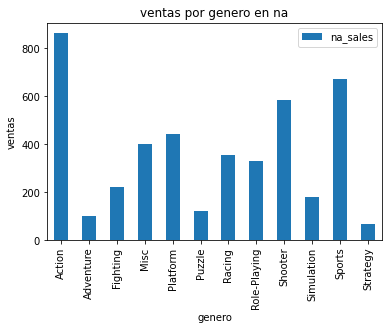

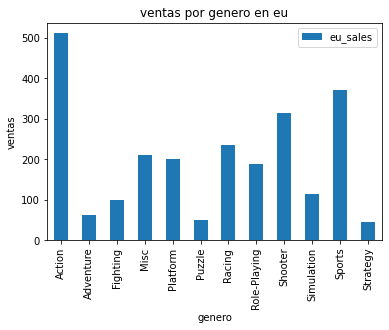

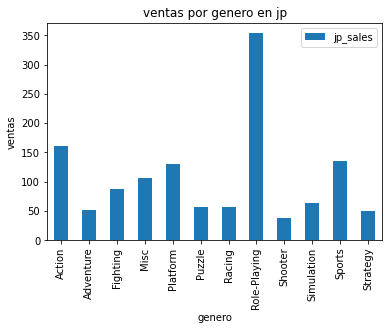

In [27]:
#cinco generos principales en na
genre_na = games.groupby("genre")["na_sales"].sum().reset_index()
genre_na.plot(kind = "bar",x="genre", y="na_sales")

# Personalizar el gráfico
plt.xlabel("genero")
plt.ylabel('ventas')
plt.title('ventas por genero en na')

# Mostrar el gráfico
plt.show()
#cinco generos principales en eu
genre_eu=games.groupby("genre")["eu_sales"].sum().reset_index()
genre_eu.plot(kind = "bar",x="genre", y="eu_sales")

# Personalizar el gráfico
plt.xlabel("genero")
plt.ylabel('ventas')
plt.title('ventas por genero en eu')

# Mostrar el gráfico
plt.show()
#cinco generos principales en jp
genre_jp=games.groupby("genre")["jp_sales"].sum().reset_index()
genre_jp.plot(kind = "bar",x="genre", y="jp_sales")

# Personalizar el gráfico
plt.xlabel("genero")
plt.ylabel('ventas')
plt.title('ventas por genero en jp')

# Mostrar el gráfico
plt.show()

los graficos para la regiones eu y na son bastante similares pero en japon el genero mas vendido seria role_playing y esto puede deberse a un tema cultural

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Ok, nuevamente eu y na se parecen, jp es diferente. Para los gráficos te recomiendo ordenar de mayor a menor.
</div>

### Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

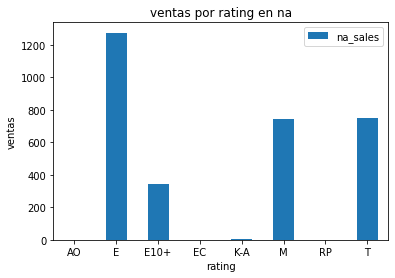

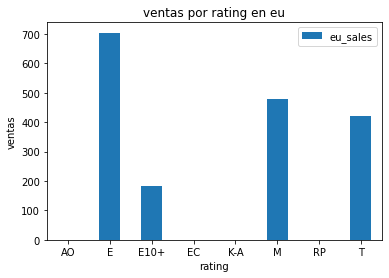

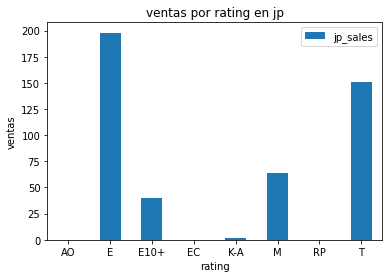

In [28]:
#Si las clasificaciones de ESRB afectan a las ventas en regiones individuales
#ventaspor esrb en na
esrb_na = games.groupby("rating")["na_sales"].sum().reset_index()
esrb_na.plot(kind = "bar",x="rating", y="na_sales")

# Personalizar el gráfico
plt.xlabel("rating")
plt.ylabel('ventas')
plt.title('ventas por rating en na')
plt.xticks(rotation=0)
# Mostrar el gráfico
plt.show()
#cinco generos principales en eu
esrb_eu=games.groupby("rating")["eu_sales"].sum().reset_index()
esrb_eu.plot(kind = "bar",x="rating", y="eu_sales")

# Personalizar el gráfico
plt.xlabel("rating")
plt.ylabel('ventas')
plt.title('ventas por rating en eu')
plt.xticks(rotation=0)
# Mostrar el gráfico
plt.show()
#cinco generos principales en jp
esrb_jp=games.groupby("rating")["jp_sales"].sum().reset_index()
esrb_jp.plot(kind = "bar",x="rating", y="jp_sales")

# Personalizar el gráfico
plt.xlabel("rating")
plt.ylabel('ventas')
plt.title('ventas por rating en jp')
plt.xticks(rotation=0)
# Mostrar el gráfico
plt.show()

con respecto a las ventas por clasificacion hay un patron claro donde la clasificacion E para todo el mundo, la clasificaion M para mature +17 y la clasificacion t para teenager son las clasificaciones que levantan mas ventas pero esto tambien debe depender de cuantos juegos salieron para cada clasificacion, ya que a un mayor numero de juegos lanzados en una categoria mas ventas tendera a acumular

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Correcto
</div>

## Paso 5. Prueba las siguientes hipótesis:

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Los test están bien, pero para el t-test debes decidir si asumiras una varianza igual entre las poblaciones o no. Para decidir esto, realiza el test de levene antes
</div>

### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [39]:
#hipotesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
#hipotesis alternativa: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son las mismas.
rating_pc=games[games["platform"]=="PC"]["user_score"]
rating_xone=games[games["platform"]=="XOne"]["user_score"]
#aplicar test levene para ver la igualdad de la varianza
rating_pc = [x for x in rating_pc if not np.isnan(x)]
rating_xone = [x for x in rating_xone if not np.isnan(x)]
statistic, p_value = levene(rating_pc, rating_xone)

print("Estadístico de Levene:", statistic)
print("Valor p:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Las varianzas son diferentes (rechazamos la igualdad)")
else:
    print("Las varianzas son iguales (no podemos rechazar la igualdad)")
alpha = 0.05
results = st.ttest_ind(rating_pc,rating_xone,nan_policy="omit",equal_var=True)
print('valor p:',results.pvalue)
if results.pvalue < alpha:# tu código: compara los valores p obtenidos con el nivel de significación estadística):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Estadístico de Levene: 3.653010350065009
Valor p: 0.05621808046851521
Las varianzas son iguales (no podemos rechazar la igualdad)
valor p: 3.280365931873243e-05
Rechazamos la hipótesis nula


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Excelente, muy bien!
</div>

segun el resultado los promedios de las calificaciones no son las mismas

### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [38]:
# hipotesis nula: Las calificaciones promedio de los usuarios para los generos de accion y deporte son iguales
# hipotesis aletnativa : Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
rating_action=games[games["genre"]=="Action"]["user_score"]
rating_sports=games[games["genre"]=="Sports"]["user_score"]
#aplicar test levene para ver la igualdad de la varianza
rating_action = [x for x in rating_action if not np.isnan(x)]
rating_sports = [x for x in rating_sports if not np.isnan(x)]
statistic, p_value = levene(rating_action, rating_sports)

print("Estadístico de Levene:", statistic)
print("Valor p:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Las varianzas son diferentes (rechazamos la igualdad)")
else:
    print("Las varianzas son iguales (no podemos rechazar la igualdad)")
alpha = 0.05
results = st.ttest_ind(rating_action,rating_sports,nan_policy="omit",equal_var=True)
print('valor p:',results.pvalue)
if results.pvalue < alpha:# tu código: compara los valores p obtenidos con el nivel de significación estadística):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Estadístico de Levene: 2.5272901306348543
Valor p: 0.1119575804230386
Las varianzas son iguales (no podemos rechazar la igualdad)
valor p: 0.0899517834023573
No podemos rechazar la hipótesis nula


segun el resultado no podemos negar que el promedio de ambas calificaciones de promedio sean diferentes, osea talves si sean diferentes significativamente

formule las hipotesis nulas primero suponiendo que ambas calificaciones promedio de ambos casos eran iguales y la alternativa que ambas medias eran diferentes y utilice el metodo de las dos colas porque no importa si las medias son o no mayores o menores solo queremos saber si son iguales o diferentes

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Excelente, muy bien!
</div>

# conclusion general
Pasamos por agarrar un dataframe dentro de todo bastante aceptable en la que no es necesario grandes cambios o arreglos lo que nos permite pasar directamente al analisis donde revisamos las plataformas mas populares desde los inicios de los tiempos y su evolucion, los efectos que reciben los juegos en sus ventas a partir de las criticas de los usuarios y los criticos porfesionales , no olvidando como afecta a las ventas el genero de juego, y un analisis especifico para cada region del mundo y para terminar se puso a prueba un par de hipoesis sobre las calificaciones promedio 

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Ok con la conclusión, resume lo realizado en el notebook pero falta incluir resultados. Es importante escribir en las conclusiones algún hallazgo que se haya descubierto al analizar la data e incluir un resultado numérico para justificarlo.
</div>